<a href="https://colab.research.google.com/github/SarvinTorkaman/DES/blob/master/DAT540.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install -U spacy
# python -m spacy download en_core_web_sm

import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/english_dataframe.csv'

In [4]:
import pandas as pd

df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.drop(['is_english','is_mostly_english'], axis=1)
df.head()


,target,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,awww thats a bummer you shoulda got david ...
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he cant update his facebook by t...
2,0,Mon Apr 06 22:19:53 PDT 2009,i dived many times for the ball managed to sa...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,no its not behaving at all im mad why am i he...


In [5]:
df["text"] = df["text"].astype(str)
df["text"] = df['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^\w\s]','',x)))
df.head()

,target,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,awww s bummer shoulda get david carr day d
1,0,Mon Apr 06 22:19:49 PDT 2009,upset not update facebook texte cry result s...
2,0,Mon Apr 06 22:19:53 PDT 2009,dive time ball manage save rest bound
3,0,Mon Apr 06 22:19:57 PDT 2009,body feel itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,behave m mad not


In [6]:
df.to_csv('prerocessed_dataframe.csv', index=False)

from google.colab import files
files.download('prerocessed_dataframe.csv') #

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

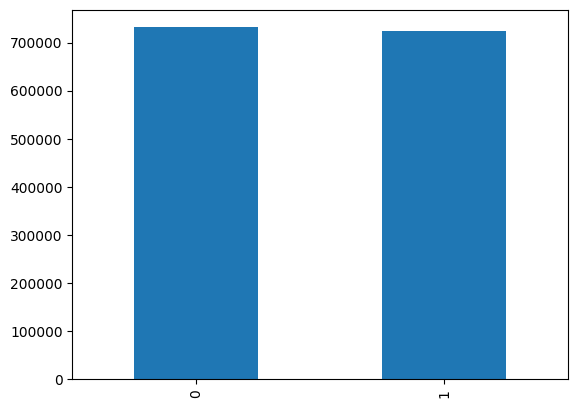

In [9]:
df['target'].value_counts()
df['target'].value_counts(normalize=True)
import matplotlib.pyplot as plt

# For a bar plot
df['target'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# First, ensure that the 'date' column is converted to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Now, set the 'date' column as the index
df.set_index('date', inplace=True)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


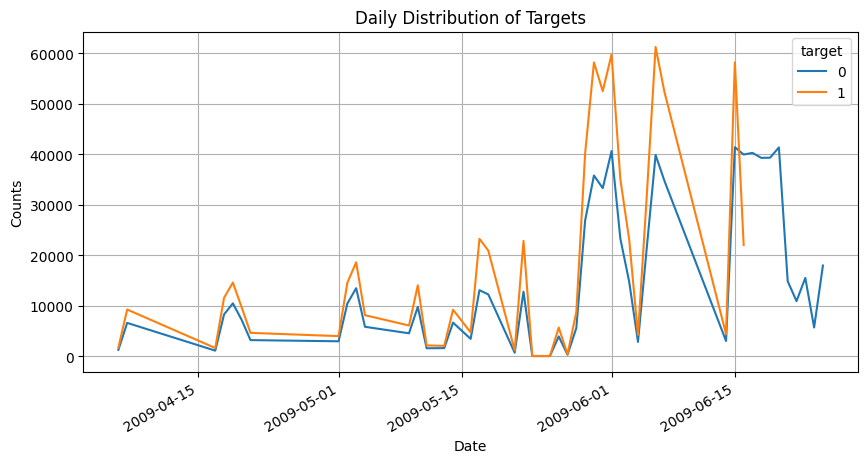

In [12]:
daily_targets = df.resample('D')['target'].value_counts().unstack()

# Plotting the daily distribution
daily_targets.plot(kind='line', figsize=(10, 5))
plt.title('Daily Distribution of Targets')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [13]:
# import pandas as pd
from sklearn.utils import resample

# Step 1: Trim the dataset up to the 15th of June 2009
trimmed_df = df[df.index <= '2009-06-16']
trimmed_df.reset_index(inplace=True)  # Reset the index to convert the date index into a column



# Step 2: Separate the dataset by target
positive_df = trimmed_df[trimmed_df['target'] == 1]
negative_df = trimmed_df[trimmed_df['target'] == 0]

# Step 3: Upsample the target 0 to match the number of target 1
negative_upsampled = resample(negative_df,
                              replace=True,     # sample with replacement
                              n_samples=len(positive_df),  # to match majority class
                              random_state=42)  # reproducible results

# Step 4: Combine the upsampled negative class with the positive class
upsampled_df = pd.concat([positive_df, negative_upsampled])

# Step 5: Shuffle the upsampled dataset
upsampled_df = upsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now upsampled_df should have a balanced distribution of targets up to 15th of June 2009.


In [14]:
print(trimmed_df['target'].value_counts())
print(upsampled_df['target'].value_counts())

# If both of the above outputs are non-empty, your plotting code should work.
# Otherwise, you'll need to investigate why the DataFrames are empty or why the 'target' column is missing.


1    701696
0    466264
Name: target, dtype: int64
1    701696
0    701696
Name: target, dtype: int64


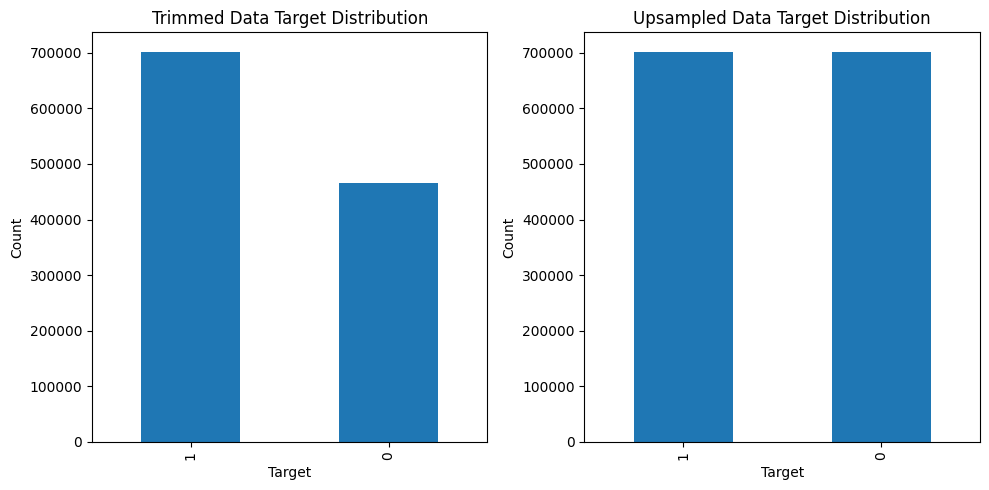

In [15]:
import matplotlib.pyplot as plt

# For the trimmed dataframe
trimmed_target_counts = trimmed_df['target'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
trimmed_target_counts.plot(kind='bar', title='Trimmed Data Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

# Assuming you have already upsampled the trimmed dataframe to create upsampled_df
upsampled_target_counts = upsampled_df['target'].value_counts()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
upsampled_target_counts.plot(kind='bar', title='Upsampled Data Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In the trimmed dataset, there is an imbalance with more instances of class 1 (positive sentiment) than class 0 (negative sentiment). After upsampling, the two classes appear to be balanced, as evidenced by the nearly equal heights of the bars in the "Upsampled Data Target Distribution" chart.

This visual inspection indicates that the upsampling process has successfully balanced the classes, which should be beneficial for training a machine learning model that requires a balanced distribution of target classes. With this preprocessing step completed, you can now proceed to other steps such as feature extraction, model selection, and model training


In [16]:
upsampled_df.head()


upsampled_df.to_csv('./upsampled_balanced_english_preproccessed_dataframe.csv', index=False)
files.download('upsampled_balanced_english_preproccessed_dataframe.csv') #

df= upsampled_df

df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,target,text
0,2009-06-01 22:41:53,1,m sure want money want cuddle
1,2009-05-01 22:26:12,1,remember happy beltane enjoy love crave
2,2009-06-02 17:44:00,1,glad great follower like
3,2009-06-02 01:11:08,0,twitter will not let upload bg image
4,2009-04-06 23:48:51,1,hm s sound scandalously sad let happ...


In [ ]:
# First, ensure 'date' is the correct datetime type and set it as the index
# upsampled_df['date'] = pd.to_datetime(upsampled_df['date'])
# upsampled_df.set_index('date', inplace=True)

# Now group by date and target, count occurrences, and unstack the target level
daily_target_distribution = df.groupby([df.index.date, 'target']).size().unstack(level=-1)

# The unstacked DataFrame should have two columns, one for each target (0 and 1)
# If the target values are not 0 and 1, adjust the column references accordingly

# Plot the daily target distribution
daily_target_distribution.plot(kind='line', figsize=(15, 5))
plt.title('Daily Distribution of Negative and Positive Targets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 3000

# Initialize the Tokenizer:

tokenizer = Tokenizer(num_words=max_features, split=' ')

# Fit the Tokenizer on the Texts:

tokenizer.fit_on_texts(df['text'].values)

In [38]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)  # Here, 20% of the data is used for validation


After splitting back df_train and df_val and fitting the tokenizer, it’s time to vectorize the tweets. That can be done using Keras’ texts_to_sequences and pad_sequences.

In [39]:
X_train = tokenizer.texts_to_sequences(df_train['text'].values)
X_val = tokenizer.texts_to_sequences(df_val['text'].values)



In [20]:
# max_sequence_length = max([len(x) for x in X_train])  # This sets the length to the longest sequence
# max_sequence_length

26

In [40]:
X_train = pad_sequences(X_train)
X_val = pad_sequences(X_val)


In [43]:
[X_train.shape,X_val.shape]

[(1122713, 26), (280679, 26)]

In [42]:
import numpy as np
X_val = np.lib.pad(X_val, ((0,0),(X_train.shape[1] - X_val.shape[1],0)), 'constant', constant_values=(0))
X_val.shape

(280679, 26)

In [44]:
import numpy as np
Y_train = np.array(pd.get_dummies(df_train['target']).values)
Y_val = np.array(pd.get_dummies(df_val['target']).values)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [81]:
import os
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)




In [ ]:
max_features = 3000
embed_dim = 128
with strategy.scope():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
    model.add(SpatialDropout1D(0.3))
    lstm_out = 128
    model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dense(2,activation='sigmoid'))
    # model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

print(model.summary())

In [64]:
import tensorflow

tensorflow.config.optimizer.set_jit(True)


In [84]:
batch_size = 512
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1, shuffle=False)

Epoch 1/15
2193/2193 [==============================] - 64s 25ms/step - loss: 0.4999 - accuracy: 0.7555
Epoch 2/15
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4797 - accuracy: 0.7687
Epoch 3/15
2193/2193 [==============================] - 50s 23ms/step - loss: 0.4734 - accuracy: 0.7721
Epoch 4/15
2193/2193 [==============================] - 51s 23ms/step - loss: 0.4693 - accuracy: 0.7744
Epoch 5/15
2193/2193 [==============================] - 51s 23ms/step - loss: 0.4663 - accuracy: 0.7760
Epoch 6/15
2193/2193 [==============================] - 56s 25ms/step - loss: 0.4637 - accuracy: 0.7779
Epoch 7/15
2193/2193 [==============================] - 51s 23ms/step - loss: 0.4613 - accuracy: 0.7791
Epoch 8/15
2193/2193 [==============================] - 50s 23ms/step - loss: 0.4596 - accuracy: 0.7798
Epoch 9/15
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4576 - accuracy: 0.7815
Epoch 10/15
2193/2193 [==============================] - 51s 23m

Epoch 1/10
2193/2193 [==============================] - 63s 25ms/step - loss: 0.4999 - accuracy: 0.7556
Epoch 2/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4792 - accuracy: 0.7689
Epoch 3/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4728 - accuracy: 0.7725
Epoch 4/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4686 - accuracy: 0.7748
Epoch 5/10
2193/2193 [==============================] - 53s 24ms/step - loss: 0.4653 - accuracy: 0.7770
Epoch 6/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4622 - accuracy: 0.7786
Epoch 7/10
2193/2193 [==============================] - 55s 25ms/step - loss: 0.4597 - accuracy: 0.7801
Epoch 8/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4576 - accuracy: 0.7816
Epoch 9/10
2193/2193 [==============================] - 52s 24ms/step - loss: 0.4554 - accuracy: 0.7827
Epoch 10/10
2193/2193 [==============================] - 59s 27m

KeyError: ignored

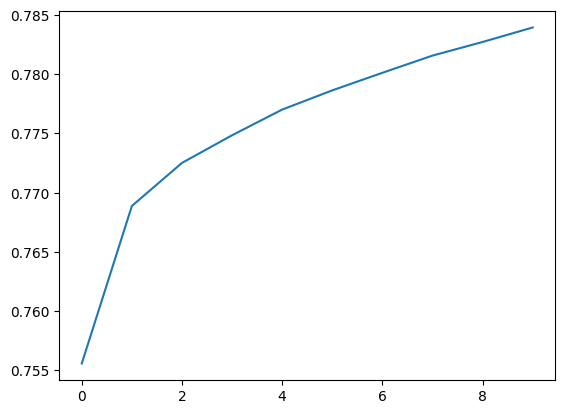

In [91]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, shuffle=False)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# history = model.fit(
#     X_train,
#     Y_train,
#     epochs=10,
#     batch_size=512,
#     validation_data=(X_val, Y_val),
#     verbose=1
# )
history = model.fit(...)
print(history.history.keys())


KeyError: ignored

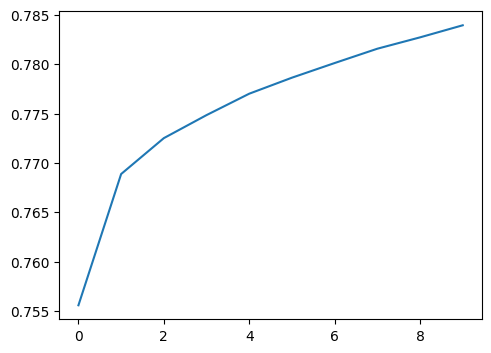

In [93]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_lstm(model, X_test,Y_test):
 pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
 results = []
 for x in range(len(X_test)):
  result =   model.predict(X_test[x].reshape(1,X_test.shape[1]),
  batch_size=1,verbose = 3)[0]
  if np.argmax(result) == np.argmax(X_test[x]):
   if np.argmax(X_test[x]) == 0:
    neg_correct += 1
  else:
    pos_correct += 1

  if np.argmax(X_test[x]) == 0:
   neg_cnt += 1
  else:
   pos_cnt += 1
  results.append(np.argmax(result))
 Y_test_argmax = np.argmax(Y_test,axis=1)
 Y_test_argmax  = Y_test_argmax.reshape(-1,1)
 results = np.asarray(results)
 results = results.reshape(-1,1)
 conf_matrix = confusion_matrix(Y_test_argmax, results)
 fig = plt.figure(figsize=(6, 6))
 sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'GnBu');
 plt.title("Confusion Matrix")
 plt.ylabel('Correct Class')
 plt.xlabel('Predicted class')

In [ ]:
accuracy,f1, fig = evaluate_lstm(model,X_val,Y_val)
print(f'Accuracy:{accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')